<a href="https://colab.research.google.com/github/andrnsgnmez/Primera-Red-Nueronal-Sin-Tensorflow/blob/main/Red_Neuronal_sin_Tensor_Flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importar librerías
import numpy as np  #Libreria para procesamiento numerico
import scipy as cp  #Expande la funcionalidad de Numpy
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles  #make_circles nos funcionara para hacer una nube de puntos no lineal

# No ejecutar
↓

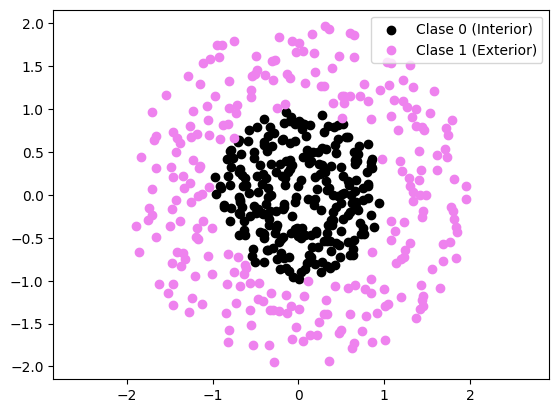

In [10]:
#Sin usar sklearn

import numpy as np
import matplotlib.pyplot as plt

# Número de puntos que deseas generar
n = 250
n1 = 250

# Radio del círculo interior
radius_inner = 1.0

# Radio del círculo exterior
radius_outer = 2.0

# Ángulo entre los puntos
theta_inner = np.linspace(0, 2 * np.pi, n)
theta_outer = np.linspace(0, 2 * np.pi, n1)

# Genera las coordenadas polares de los puntos para cada clase
r_inner = np.sqrt(np.random.uniform(0, radius_inner**2, n))
r_outer = np.sqrt(np.random.uniform(radius_inner**2, radius_outer**2, n1))

# Etiqueta de la clase: 0 para el círculo interior y 1 para el círculo exterior
labels_inner = np.zeros(n)
labels_outer = np.ones(n1)

# Convierte las coordenadas polares a cartesianas para ambas clases
x_inner = r_inner * np.cos(theta_inner)
y_inner = r_inner * np.sin(theta_inner)

x_outer = r_outer * np.cos(theta_outer)
y_outer = r_outer * np.sin(theta_outer)

# Concatena las características y etiquetas de ambas clases
X = np.vstack((np.column_stack((x_inner, y_inner)), np.column_stack((x_outer, y_outer))))
Y = np.hstack((labels_inner, labels_outer))

# Grafica los puntos de ambas clases
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], c="black", label="Clase 0 (Interior)")
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], c="violet", label="Clase 1 (Exterior)")
plt.axis("equal")
plt.legend()
plt.show()


# Si ejecutar
↓

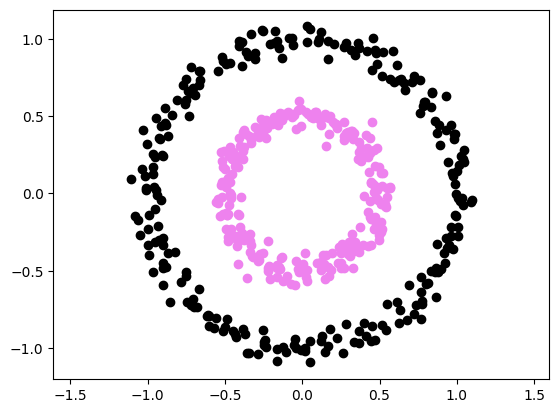

In [13]:
#Usando sklearn
#Creación del dataset

n = 500  #Numero de registros que tenemos en nuestros datos
p = 2    #Numero de caracteristicas que tendran nuestros datos

#"factor" es la distancia en que se encuentran los circulos y "noise" corresponde al ruido que tiene nuestra nube de puntos
X, Y = make_circles(n_samples=n, factor = 0.5, noise=0.05)


Y = Y[:, np.newaxis]  #como "y" nos devuelve una serie, en lugar de una matrix columna, hacemos uso de esta actualizacion para solucionarlo

plt.scatter(X[Y[:, 0] == 0,0], X[Y[:, 0] == 0,1], c = "black")
plt.scatter(X[Y[:, 0] == 1,0], X[Y[:, 0] == 1,1], c = "violet")
plt.axis("equal")
plt.show()

In [ ]:
#Clase de la capa de la red
#Creación la capa de la red
class neural_layer():
  def __init__(self, n_conn, n_neur, act_f):   #Creamos el inicializador de la capa y ponemos (parametros de la capa, # de conexiones, # neuronas, funcion de activaciion de capa)

    self.act_f = act_f

    self.b = np.random.rand(1, n_neur)      * 2 - 1     #Vector para iniciar parámetro de bias de forma aleatoria
    self.W = np.random.rand(n_conn, n_neur) * 2 - 1     #Matriz para inicializar

Funcion de activacion de sigmoide

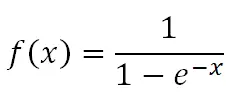

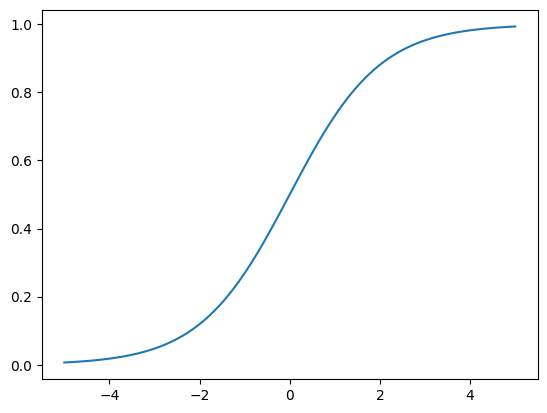

In [15]:
#Funcion de activacion/ usaremos la sigmoide
#Creación de las funciones de activación

sigm = (lambda x: 1 / (1 + np.e ** (-x)),   #funcion sigmoide - se usa usando "0"
        lambda x: x * (1 - x))   #derivada de la funcion Sigmoide - para usarla despues en el backpropagation se usa usando "1"


_x = np.linspace(-5, 5, 100)
plt.plot(_x, sigm[0](_x))

## **Diseño de nuestra red neuronal**

In [16]:
#aqui empezamos a crear nuestra neurna
#nuestra capa cero "l0"
l0 = neural_layer(p, 4, sigm) #donde "p" numero de conexiones; "4" numero de neuronas; "sigm" nuestra funcion de activacion
l1 = neural_layer(4, 8, sigm)
#....


def create_nn(topology, act_f):

  nn = []
  for l, layer in enumerate(topology[:-1]):

    nn.append(neural_layer(topology[l], topology[l+1], act_f))

  return nn



In [20]:
#Celda encargada de entrarnar nuestra red neur0nal

topology = [p, 4, 8, 1]  #Cantidad de capas ocultas que tiene la red neuronal

neural_net = create_nn(topology, sigm)  # red neuronal

l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2), #Error cuadrático medio  (Función de coste)
           lambda Yp, Yr: (Yp - Yr))               #Derivada


def train(neural_net, X, Y, l2_cost, lr=0.5, train=True):   #parametros (nuestra red neuronal; datos de entrada; datos de salida; funcion de coste; factor de multiplicacion para nuestro descenso de gradiente)

  out = [(None, X)]   #vector para guardar nuestra informacion

  #Forward pass (procesamiento de la red neuronal)
  for l, layer in enumerate(neural_net):                 #bucle para que recorra cada una de nuestras capas

    z = out[-1][1] @ neural_net[l].W + neural_net[l].b   #Suma ponderada
    a = neural_net[l].act_f[0](z)                        #nuestra activacion

    out.append((z,a))

  if train:

    # Backpropagation
    deltas = []

    for l in reversed(range(0, len(neural_net))): #Reversed ayuda a que se evalúe de atrás hacia delante


      z = out[l+1][0]
      a = out[l+1][1]

      if l == len(neural_net) - 1:
        #Calcular delta de la última capa
        deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_f[1](a))

      else:
        #Calcular delta respecto a capa previa
        deltas.insert(0, deltas[0] @ _W.T * neural_net[l].act_f[1](a))

      _W = neural_net[l].W   # variable auxiliar
      # Descenso del gradiente
      #Para no hacer uso de un nuevo ciclo for, lo haremos en este mismo ciclo para ir actualizando nuestros parametros en funcion de nuestros vectores gradientes
      neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr

      neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lr

  return out[-1][1]

train(neural_net, X, Y, l2_cost, 0.5)
print("")

## comprobación de la red

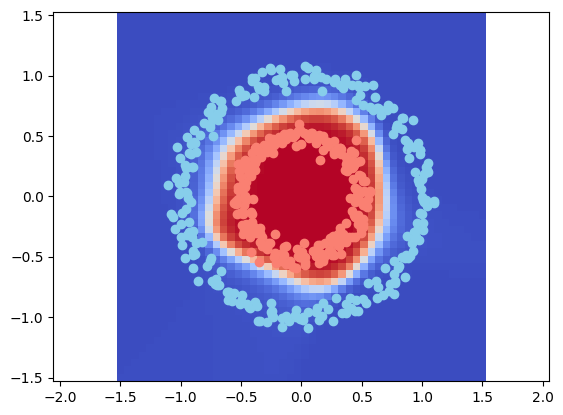

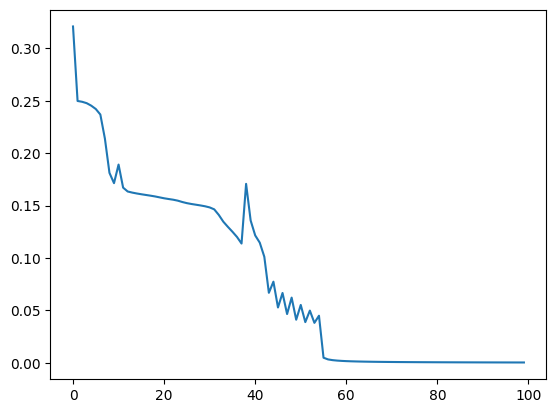

In [21]:
import time
from IPython.display import clear_output

neural_n = create_nn(topology, sigm)  #creamos denuevo una red neuro

loss = [] #creamos un vector vacio donde se van a guardar los diferentes costes segun se vaya entrenando la red

for i in range(2500):  # iteramos muchas veces
  pY = train(neural_n, X, Y, l2_cost, lr=0.05)
  if i % 25 == 0:  # cada 25 iteraciones calculamos el corte y lo añadimos a nuestro vector
    loss.append(l2_cost[0](pY, Y))

    #generamos una especie de malla de 50x50, para hacer una prediccion en cada uno de los puntos
    res = 50

    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)

    _Y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, l2_cost, train=False)[0][0]

    plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
    plt.axis("equal")

    plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c="skyblue")
    plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c="salmon")

    #borrar el contenido y volver a dibujarlo para que se vea de forma animada
    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.5)

# Ya tenemos nuestra primera red neuronal Pronto haremos este mismo ejercicio pero con otra funcion de activacion y con otro data set: ❤